### Random Forest with 25 features

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
# Read the dataset
data = pd.read_csv("./data_top25_dfeatures.csv")
data.shape

(99340, 26)

In [59]:
data.head()

,num_lab_procedures,num_medications,time_in_hospital,age,num_procedures,number_diagnoses,number_inpatient,service_utilization,admission_source_id,gender,...,diag_2_circulatory,medical_specialty_Missing,race_Caucasian,number_emergency,diag_1_circulatory,diag_3_neoplasms,medical_specialty_InternalMedicine,diag_2_neoplasms,diag_3_diabetes,readmitted
0,-0.097257,-1.850433,-1.138455,5,-0.783548,-3.298205,-0.635213,-0.774135,-1.431088,0,...,0,0,1,-0.323034,0,0,0,0,0,0
1,0.820652,0.249657,-0.464686,15,-0.783548,0.823423,-0.635213,-0.774135,0.648827,0,...,0,1,1,-0.323034,0,1,0,0,0,0
2,-1.627106,-0.368016,-0.801570,25,2.152858,-0.722187,0.724104,1.319347,0.648827,0,...,0,1,0,-0.323034,0,0,0,0,0,0
3,0.055727,0.002588,-0.801570,35,-0.196267,-0.206984,-0.635213,-0.774135,0.648827,1,...,0,1,1,-0.323034,0,0,0,0,0,0
4,0.412692,-0.985690,-1.138455,45,-0.783548,-1.237391,-0.635213,-0.774135,0.648827,1,...,0,1,1,-0.323034,0,0,0,1,1,0


In [60]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [61]:
# Random Forest

# Let's first fit a random forest model with default hyperparameters.
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [63]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
# predict
predictions = rfc.predict(X_test)

In [65]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[17362   243]
 [ 2157   106]]


In [66]:
print(accuracy_score(y_test,predictions))

0.8792027380712704


In [67]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17605
           1       0.30      0.05      0.08      2263

    accuracy                           0.88     19868
   macro avg       0.60      0.52      0.51     19868
weighted avg       0.82      0.88      0.84     19868



In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
param_grid = {'max_features': [4, 8, 14, 20],
             'n_estimators': range(100, 1500, 400),
             'max_depth': range(2, 20, 5),
             'min_samples_leaf': range(100, 400, 50),
             'min_samples_split': range(200, 500, 50),
             }
# instantiate the model 
rf = RandomForestClassifier()


# fit tree on training data
rf = RandomizedSearchCV(rf, param_grid, 
                  cv=n_folds, 
                  scoring="accuracy",
                  return_train_score=True,
                  n_jobs = -1,verbose = 1)
rf.fit(X_train, y_train)

best_parameters = rf.best_params_
print(best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 500, 'min_samples_split': 450, 'min_samples_leaf': 100, 'max_features': 14, 'max_depth': 17}


In [71]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,59.798544,0.434290,0.604027,0.046845,100,300,350,14,12,"{'n_estimators': 100, 'min_samples_split': 300...",...,0.826154,0.086077,3,0.867368,0.820099,0.820589,0.819222,0.822373,0.829930,0.018747
1,113.357718,0.634001,3.988026,0.081820,1300,450,250,4,2,"{'n_estimators': 1300, 'min_samples_split': 45...",...,0.706089,0.034384,9,0.731160,0.702404,0.701227,0.702762,0.701200,0.707751,0.011721
2,170.007929,1.998870,2.530532,0.091941,500,300,150,8,7,"{'n_estimators': 500, 'min_samples_split': 300...",...,0.793571,0.070323,7,0.834495,0.788574,0.790129,0.787431,0.789330,0.797992,0.018273
3,334.596261,5.702701,7.837084,0.424925,1300,250,350,4,17,"{'n_estimators': 1300, 'min_samples_split': 25...",...,0.800067,0.070654,6,0.850346,0.796704,0.795401,0.795383,0.796075,0.806782,0.021787
4,34.611176,1.228292,0.579777,0.019677,100,250,100,8,7,"{'n_estimators': 100, 'min_samples_split': 250...",...,0.792264,0.070308,8,0.832968,0.787465,0.787919,0.791522,0.786348,0.797244,0.017946


In [72]:
# Get the best parameters
best_parameters = rf.best_params_
print(best_parameters)

{'n_estimators': 500, 'min_samples_split': 450, 'min_samples_leaf': 100, 'max_features': 14, 'max_depth': 17}


In [73]:
# Build the Random Forest with the best_parameters
rf_best = RandomForestClassifier(n_estimators=best_parameters['n_estimators'],
                                 min_samples_split=best_parameters['min_samples_split'],
                                 min_samples_leaf=best_parameters['min_samples_leaf'],
                                 max_features=best_parameters['max_features'],
                                 max_depth=best_parameters['max_depth'],
                                 criterion='gini')
# fit the model
rf_best.fit(X_train, y_train)

# predict
best_predictions = rf_best.predict(X_test)

Validation Accuracy=  0.8587282386113362


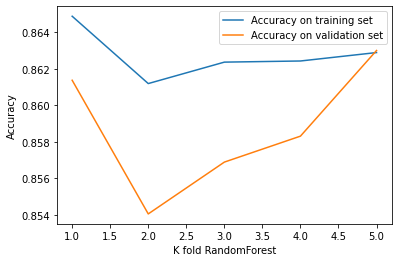

In [76]:
# validate the model using kfold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

y_train_skf = y_train.values
X_train_skf = X_train.values
train_score = []
test_score = []
splits=5
folds=range(1,splits+1)
val_score = 0.0
skf = StratifiedKFold(n_splits=splits, shuffle=True)
for train_index, test_index in skf.split(X_train_skf, y_train_skf):
    X_train_cv, y_train_cv = X_train_skf[train_index], y_train_skf[train_index]
    X_test_cv, y_test_cv = X_train_skf[test_index], y_train_skf[test_index]
    rf_val = RandomForestClassifier(n_estimators=best_parameters['n_estimators'],
                                 min_samples_split=best_parameters['min_samples_split'],
                                 min_samples_leaf=best_parameters['min_samples_leaf'],
                                 max_features=best_parameters['max_features'],
                                 max_depth=best_parameters['max_depth'],
                                 criterion='gini')
    rf_val.fit(X_train_cv,y_train_cv)
    y_test_cv_predict = rf_val.predict(X_test_cv)
    val_score += metrics.roc_auc_score(y_test_cv, y_test_cv_predict)
    train_score.append(rf_val.score(X_train_cv,y_train_cv))
    test_score.append(rf_val.score(X_test_cv,y_test_cv))

print("Validation Accuracy= ", val_score/splits)    
plt.plot(folds,train_score,label= 'Accuracy on training set')
plt.plot(folds,test_score,label= 'Accuracy on validation set')
plt.xlabel('K fold RandomForest')
plt.ylabel('Accuracy')
plt.legend()

In [74]:
# evaluation metrics
print(classification_report(y_test,best_predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     17605
           1       0.29      0.10      0.15      2263

    accuracy                           0.87     19868
   macro avg       0.59      0.53      0.54     19868
weighted avg       0.82      0.87      0.84     19868



In [75]:
# Let's check the overall accuracy over the test dataset
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
print("Accuracy_score: ", metrics.accuracy_score(y_test, best_predictions))

print("AUC_accu =", metrics.roc_auc_score(y_test, best_predictions ))
print("Precision_score = ",precision_score(y_test, best_predictions))
print("recall_score = ",recall_score(y_test, best_predictions))


Accuracy_score:  0.8694382927320314
AUC_accu = 0.533729257558619
Precision_score =  0.28754813863928114
recall_score =  0.09898365002209457


### Build the model using stratifiedsplit

In [81]:
# Read the dataset
data = pd.read_csv("./data_top25_dfeatures.csv")
data.shape

(99340, 26)

In [127]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import StratifiedShuffleSplit

# Get the predictors and target variable
y = data['readmitted'].values
X = data.drop(['readmitted'], axis=1).values

oversample = SMOTE(random_state=0, sampling_strategy=0.5)
# split the data into train/test 
strf_split = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
for train_index, test_index in strf_split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [128]:
X_train_str, y_train_str = oversample.fit_resample(X_train, y_train)

In [129]:
# Random Forest

# Let's first fit a random forest model with default hyperparameters.
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [130]:
rfc = RandomForestClassifier()

In [131]:
rfc.fit(X_train_str, y_train_str)

RandomForestClassifier()

In [132]:
# predict
predictions = rfc.predict(X_test)

In [133]:
# Let's check the overall accuracy over the test dataset
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
print("Accuracy_score: ", metrics.accuracy_score(y_test, predictions))

print("AUC_accu =", metrics.roc_auc_score(y_test, predictions ))
print("Precision_score = ",precision_score(y_test, predictions))
print("recall_score = ",recall_score(y_test, predictions))

Accuracy_score:  0.8851419367827662
AUC_accu = 0.5052367193217189
Precision_score =  0.379746835443038
recall_score =  0.013256738842244807
